In [1]:

import os
import glob as gb
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications import MobileNetV2,VGG16
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,BatchNormalization,Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install dataframe_image

In [ ]:
path = "/content/drive/MyDrive/fish_classification/NA_Fish_Dataset"

In [ ]:
folder_list = os.listdir(path)

In [ ]:
folder_list

['Horse Mackerel',
 'Shrimp',
 'Sea Bass',
 'Gilt Head Bream',
 'Red Mullet',
 'Black Sea Sprat',
 'Nofish',
 'Trout',
 'Red Sea Bream',
 'Striped Red Mullet']

In [ ]:
path1 =[]
label = []
for folder in folder_list:
    pathx = path + '/' + folder
    inside_pics = os.listdir(pathx)

    for file_name in inside_pics :
        path_mod = os.path.join(pathx ,file_name)
        path1.append(path_mod)
        label.append(folder)


In [ ]:
len(path1)

2484

In [ ]:
len(label)

2484

In [ ]:
df = pd.DataFrame({"Images Path": path1 , "Labels" :label})

In [ ]:
df.Labels.value_counts()

Nofish                2054
Horse Mackerel          50
Shrimp                  50
Sea Bass                50
Gilt Head Bream         50
Red Mullet              50
Black Sea Sprat         50
Red Sea Bream           50
Striped Red Mullet      50
Trout                   30
Name: Labels, dtype: int64

In [ ]:
df

Images Path              Labels
0     /content/drive/MyDrive/fish_classification/NA_...      Horse Mackerel
1     /content/drive/MyDrive/fish_classification/NA_...      Horse Mackerel
2     /content/drive/MyDrive/fish_classification/NA_...      Horse Mackerel
3     /content/drive/MyDrive/fish_classification/NA_...      Horse Mackerel
4     /content/drive/MyDrive/fish_classification/NA_...      Horse Mackerel
...                                                 ...                 ...
2479  /content/drive/MyDrive/fish_classification/NA_...  Striped Red Mullet
2480  /content/drive/MyDrive/fish_classification/NA_...  Striped Red Mullet
2481  /content/drive/MyDrive/fish_classification/NA_...  Striped Red Mullet
2482  /content/drive/MyDrive/fish_classification/NA_...  Striped Red Mullet
2483  /content/drive/MyDrive/fish_classification/NA_...  Striped Red Mullet

[2484 rows x 2 columns]

No charts were generated by quickchart


In [ ]:
sample_drop = df[df['Labels'] =="Nofish"].head(1500)

In [ ]:
df_mod = df.drop(sample_drop.index)

In [ ]:
df_mod.Labels.value_counts()

Nofish                554
Horse Mackerel         50
Shrimp                 50
Sea Bass               50
Gilt Head Bream        50
Red Mullet             50
Black Sea Sprat        50
Red Sea Bream          50
Striped Red Mullet     50
Trout                  30
Name: Labels, dtype: int64

In [ ]:
df_mod =df_mod.reset_index(drop = True)
images_df = df_mod.copy()

In [ ]:
sample_unique = images_df.drop_duplicates(subset ="Labels" ).copy()
sample_unique =sample_unique.reset_index(drop = True)
sample_unique

Images Path              Labels
0  /content/drive/MyDrive/fish_classification/NA_...      Horse Mackerel
1  /content/drive/MyDrive/fish_classification/NA_...              Shrimp
2  /content/drive/MyDrive/fish_classification/NA_...            Sea Bass
3  /content/drive/MyDrive/fish_classification/NA_...     Gilt Head Bream
4  /content/drive/MyDrive/fish_classification/NA_...          Red Mullet
5  /content/drive/MyDrive/fish_classification/NA_...     Black Sea Sprat
6  /content/drive/MyDrive/fish_classification/NA_...              Nofish
7  /content/drive/MyDrive/fish_classification/NA_...               Trout
8  /content/drive/MyDrive/fish_classification/NA_...       Red Sea Bream
9  /content/drive/MyDrive/fish_classification/NA_...  Striped Red Mullet

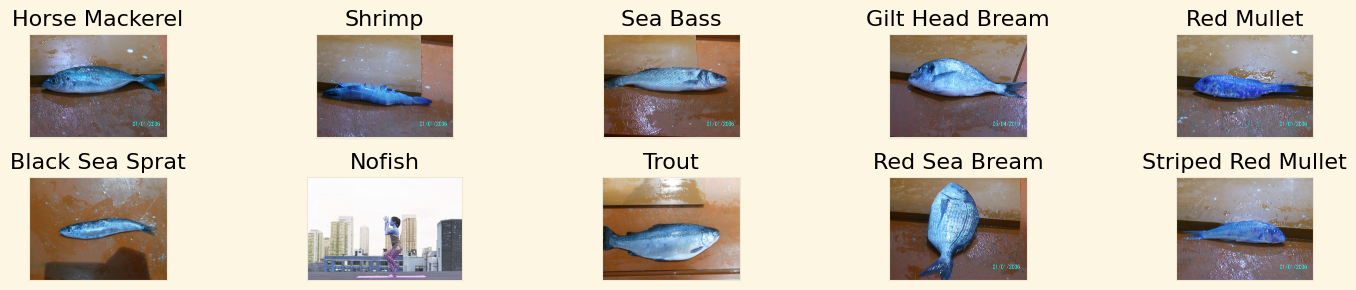

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import Image

# Assuming images_df is a pandas dataframe with columns 'Images Path' and 'Labels'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

# Loop over the first 5 rows of the dataframe
for i, ax in enumerate(axes.flat):
    # Read the image from the path
    try:
        img = Image(sample_unique['Images Path'][i])
        ax.imshow(img)
        ax.set_title(sample_unique['Labels'][i])
    except:
        img = cv2.imread(sample_unique['Images Path'][i])
        ax.imshow(img)
        ax.set_title(sample_unique['Labels'][i])

plt.tight_layout()
plt.show()


In [ ]:
training_df,testing_df=train_test_split(images_df,test_size=0.1,shuffle=True,random_state=1)

In [ ]:
training_df.shape

(885, 2)

In [ ]:
testing_df.shape

(99, 2)

In [ ]:
training_generator=ImageDataGenerator(
                                     tf.keras.applications.vgg16.preprocess_input,
                                      validation_split=0.2,
                                      )

testing_generator=ImageDataGenerator(
                                    tf.keras.applications.vgg16.preprocess_input
                                    )


In [ ]:
training_df.Labels.value_counts()

Nofish                504
Black Sea Sprat        48
Shrimp                 46
Red Sea Bream          45
Horse Mackerel         44
Sea Bass               43
Red Mullet             43
Gilt Head Bream        43
Striped Red Mullet     42
Trout                  27
Name: Labels, dtype: int64

In [ ]:
testing_df.Labels.value_counts()

Nofish                50
Striped Red Mullet     8
Red Mullet             7
Gilt Head Bream        7
Sea Bass               7
Horse Mackerel         6
Red Sea Bream          5
Shrimp                 4
Trout                  3
Black Sea Sprat        2
Name: Labels, dtype: int64

In [ ]:
training_images=training_generator.flow_from_dataframe(

    dataframe=training_df,
    x_col='Images Path',
    y_col='Labels',
    class_mode='categorical',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'

)


validation_images=training_generator.flow_from_dataframe(


    dataframe=training_df,
    x_col='Images Path',
    y_col='Labels',
    class_mode='categorical',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'

)


testing_images=testing_generator.flow_from_dataframe(


    dataframe=testing_df,
    x_col='Images Path',
    y_col='Labels',
    class_mode='categorical',
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    shuffle=False,
)

Found 708 validated image filenames belonging to 10 classes.
Found 177 validated image filenames belonging to 10 classes.
Found 99 validated image filenames belonging to 10 classes.


In [ ]:
pretrained_model=VGG16(

    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable=False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=0,factor=0.1)

model_check_point=ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5',save_best_only=True,verbose=True)

In [ ]:

epochs=7
batch_size=32
inputs=pretrained_model.input

x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)
x=Dropout(rate=0.3)(x)
x=BatchNormalization()(x)
x=Dense(64,activation='relu')(x)

outputs=Dense(10,activation='softmax')(x)


model=Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(

    training_images,
    validation_data=validation_images,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping,reduce_lr,model_check_point]

)

Epoch 1/7
23/23 [==============================] - ETA: 0s - loss: 1.7784 - accuracy: 0.3955 
Epoch 1: val_accuracy improved from -inf to 0.74576, saving model to ./bestmodel.h5
23/23 [==============================] - 559s 24s/step - loss: 1.7784 - accuracy: 0.3955 - val_loss: 0.6890 - val_accuracy: 0.7458 - lr: 0.0010
Epoch 2/7
23/23 [==============================] - ETA: 0s - loss: 0.7568 - accuracy: 0.7881 
Epoch 2: val_accuracy improved from 0.74576 to 0.81356, saving model to ./bestmodel.h5
23/23 [==============================] - 550s 24s/step - loss: 0.7568 - accuracy: 0.7881 - val_loss: 0.5105 - val_accuracy: 0.8136 - lr: 0.0010
Epoch 3/7
23/23 [==============================] - ETA: 0s - loss: 0.4686 - accuracy: 0.8884 
Epoch 3: val_accuracy improved from 0.81356 to 0.87571, saving model to ./bestmodel.h5
23/23 [==============================] - 557s 25s/step - loss: 0.4686 - accuracy: 0.8884 - val_loss: 0.3813 - val_accuracy: 0.8757 - lr: 0.0010
Epoch 4/7
23/23 [===========

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

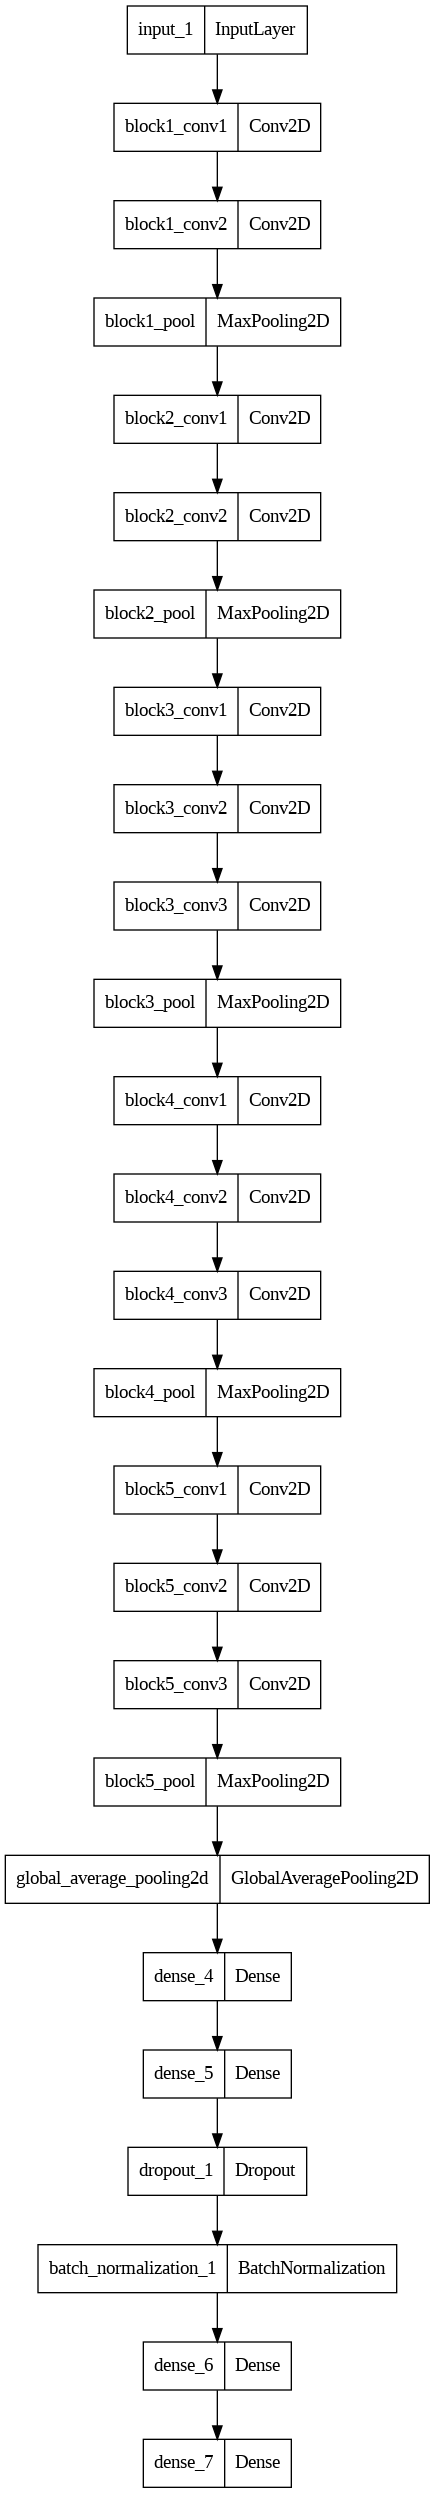

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
history_df=pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy     lr
0  1.778357  0.395480  0.689035      0.745763  0.001
1  0.756789  0.788136  0.510523      0.813559  0.001
2  0.468644  0.888418  0.381301      0.875706  0.001
3  0.321545  0.905367  0.344537      0.870057  0.001
4  0.265088  0.936441  0.220946      0.949153  0.001
5  0.205946  0.946328  0.218289      0.943503  0.001
6  0.181299  0.947740  0.516385      0.836158  0.001

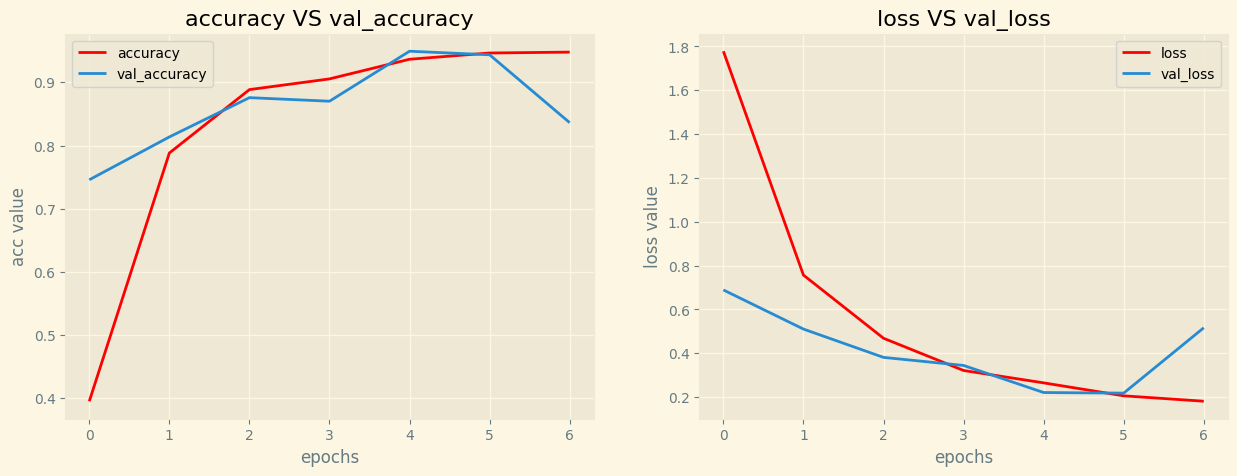

In [ ]:
plt.figure(figsize=(15,5))

# plotting accuracy and val_accuracy
plt.subplot(1,2,1)
plt.plot(history_df['accuracy'],label='accuracy',c='red')
plt.plot(history_df['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('acc value')
plt.title('accuracy VS val_accuracy')
plt.legend()
# plotting loss and val_loss
plt.subplot(1,2,2)
plt.plot(history_df['loss'],label='loss',c='red')
plt.plot(history_df['val_loss'],label='val_loss')
plt.title('loss VS val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

plt.show()

In [ ]:
training_images.class_indices

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Horse Mackerel': 2,
 'Nofish': 3,
 'Red Mullet': 4,
 'Red Sea Bream': 5,
 'Sea Bass': 6,
 'Shrimp': 7,
 'Striped Red Mullet': 8,
 'Trout': 9}

In [ ]:
Evaluation=model.evaluate(testing_images)


print("Test Accuracy: {:.2f}%".format(Evaluation[1] * 100))
print("Test Loss: {:.5f}".format(Evaluation[0]))

4/4 [==============================] - 65s 15s/step - loss: 0.2127 - accuracy: 0.9394
Test Accuracy: 93.94%
Test Loss: 0.21270


In [ ]:

# prediction=np.argmax(prediction,axis=1)
prediction

array([8, 4, 3, 3, 3, 3, 3, 0, 3, 3, 4, 2, 3, 3, 3, 9, 3, 5, 3, 3, 3, 3,
       4, 3, 3, 0, 4, 3, 3, 3, 5, 3, 3, 6, 8, 7, 3, 4, 5, 5, 6, 3, 2, 3,
       3, 3, 2, 3, 2, 5, 3, 7, 6, 3, 3, 3, 8, 7, 5, 8, 5, 3, 3, 3, 3, 4,
       4, 3, 8, 3, 3, 7, 1, 0, 3, 8, 3, 6, 4, 1, 3, 3, 6, 1, 3, 3, 6, 9,
       3, 3, 9, 4, 3, 3, 1, 6, 0, 1, 3])

In [ ]:
labels = (training_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
prediction = [labels[k] for k in prediction]

In [ ]:
prediction[:8]

['Striped Red Mullet',
 'Red Mullet',
 'Nofish',
 'Nofish',
 'Nofish',
 'Nofish',
 'Nofish',
 'Black Sea Sprat']

In [ ]:
y_true=testing_df['Labels'].values
print(classification_report(y_true,prediction))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.50      1.00      0.67         2
   Gilt Head Bream       1.00      0.71      0.83         7
    Horse Mackerel       1.00      0.67      0.80         6
            Nofish       1.00      1.00      1.00        50
        Red Mullet       0.78      1.00      0.88         7
     Red Sea Bream       0.71      1.00      0.83         5
          Sea Bass       1.00      1.00      1.00         7
            Shrimp       1.00      1.00      1.00         4
Striped Red Mullet       1.00      0.75      0.86         8
             Trout       1.00      1.00      1.00         3

          accuracy                           0.94        99
         macro avg       0.90      0.91      0.89        99
      weighted avg       0.96      0.94      0.94        99



In [ ]:
temp_df=testing_df.copy()
temp_df['predicted']=prediction

temp_df.loc[temp_df['Labels']==temp_df['predicted'],'Same'] = 'True'
temp_df.loc[temp_df['Labels']!=temp_df['predicted'],'Same'] = 'False'
temp_df=temp_df.reset_index(drop=True)
temp_df.head()

Images Path              Labels  \
0  /content/drive/MyDrive/fish_classification/NA_...  Striped Red Mullet   
1  /content/drive/MyDrive/fish_classification/NA_...          Red Mullet   
2  /content/drive/MyDrive/fish_classification/NA_...              Nofish   
3  /content/drive/MyDrive/fish_classification/NA_...              Nofish   
4  /content/drive/MyDrive/fish_classification/NA_...              Nofish   

            predicted  Same  
0  Striped Red Mullet  True  
1          Red Mullet  True  
2              Nofish  True  
3              Nofish  True  
4              Nofish  True

In [ ]:
temp_df.Same.value_counts()

True     93
False     6
Name: Same, dtype: int64

In [ ]:
temp_df['Images Path'][4]

'/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Nofish/image_2095.jpg'

In [ ]:
temp_df['Images Path'][1]

'/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Red Mullet/00039.png'

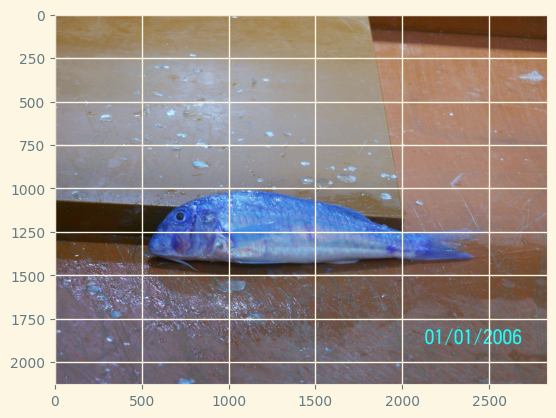

In [ ]:
classes_names

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Horse Mackerel': 2,
 'Nofish': 3,
 'Red Mullet': 4,
 'Red Sea Bream': 5,
 'Sea Bass': 6,
 'Shrimp': 7,
 'Striped Red Mullet': 8,
 'Trout': 9}

In [ ]:
from keras.models import load_model
import cv2

import os
import glob as gb
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications import MobileNetV2,VGG16
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img,img_to_array



def CreateModel():
    model=load_model('/content/bestmodel.h5')
    return model

def get_img_array(img_path, size):
    img = load_img(img_path, target_size=size)
    array = img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def demo_prediction(image_path):
    images_predict = get_img_array(image_path, size = (224, 224))
    model = CreateModel()
    prediction_ = np.argmax(model.predict(images_predict))
    prediction_classes = {'Black Sea Sprat': 0,
      'Gilt Head Bream': 1,
      'Horse Mackerel': 2,
      'No Fish In Images': 3,
      'Red Mullet': 4,
      'Red Sea Bream': 5,
      'Sea Bass': 6,
      'Shrimp': 7,
      'Striped Red Mullet': 8,
      'Trout': 9}


    for key , value in prediction_classes.items():
      if str(value) == str(prediction_) :
          return cv2.imread(image_path) , key

1/1 [==============================] - 1s 794ms/step
***** Input Image Given having ##No Fish In Images## type Fish **********


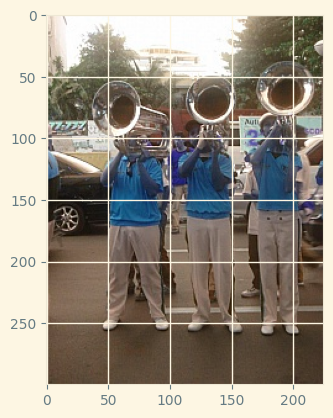

In [ ]:

input_path = "drive/MyDrive/fish_classification/NA_Fish_Dataset/Nofish/image_827.jpg"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 728ms/step
***** Input Image Given having ##No Fish In Images## type Fish **********


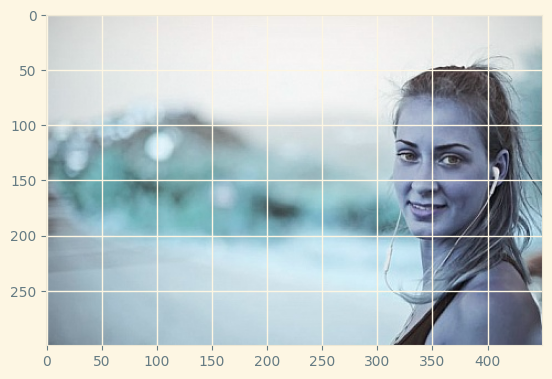

In [ ]:

input_path = "drive/MyDrive/fish_classification/NA_Fish_Dataset/Nofish/image_2162.jpg"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 765ms/step
***** Input Image Given having ##No Fish In Images## type Fish **********


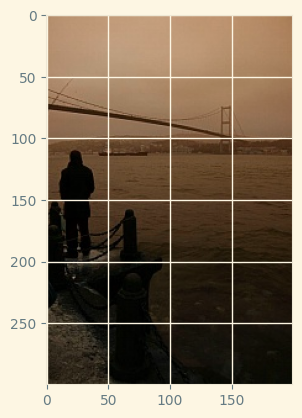

In [ ]:

input_path = "drive/MyDrive/fish_classification/NA_Fish_Dataset/Nofish/image_480.jpg"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 734ms/step
***** Input Image Given having ##Black Sea Sprat## type Fish **********


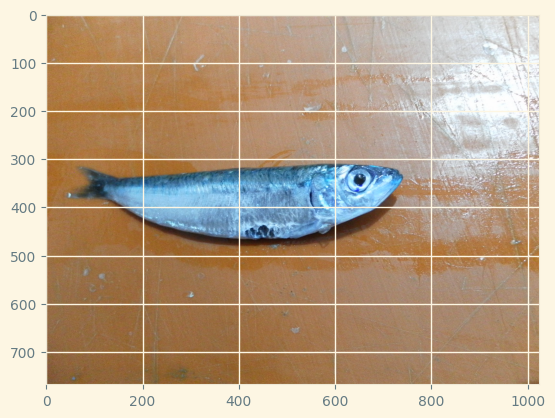

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Black Sea Sprat/00001.png"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Black Sea Sprat/00002.png"
input_path = "/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Black Sea Sprat/00003.png"


img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 1s/step
***** Input Image Given having ##Gilt Head Bream## type Fish **********


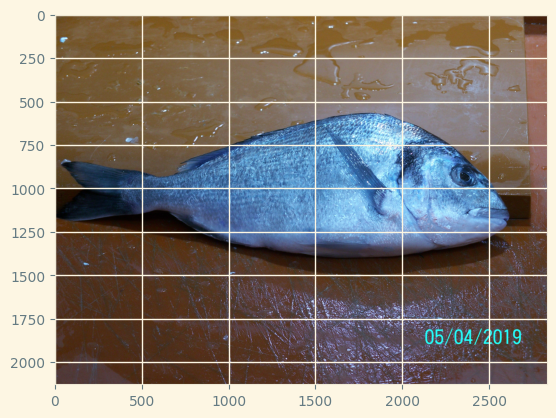

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Gilt Head Bream/1.JPG"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Gilt Head Bream/10.JPG"
input_path ="/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Gilt Head Bream/11.JPG"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 1s/step
***** Input Image Given having ##Horse Mackerel## type Fish **********


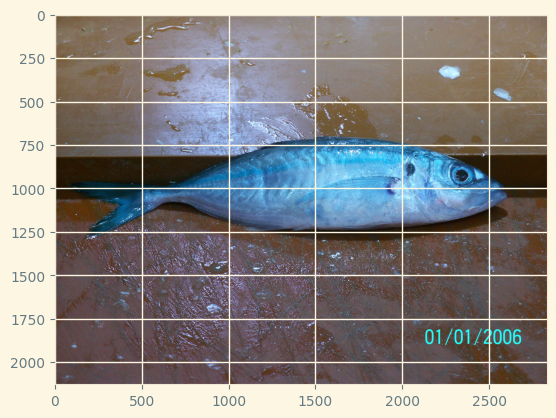

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Horse Mackerel/00001.png"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Horse Mackerel/00002.png"
input_path ="/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Horse Mackerel/00003.png"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 778ms/step
***** Input Image Given having ##Red Mullet## type Fish **********


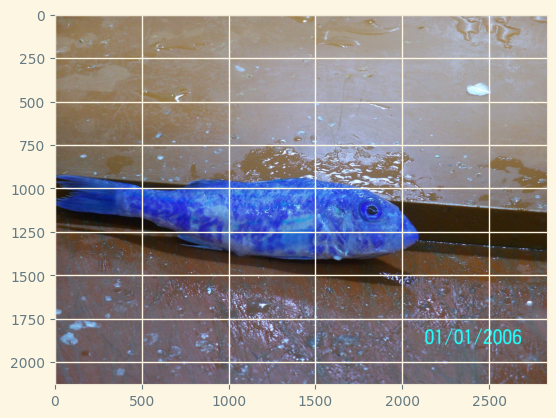

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Red Mullet/00001.png"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Red Mullet/00002.png"
input_path ="/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Red Mullet/00003.png"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 1s/step
***** Input Image Given having ##Red Sea Bream## type Fish **********


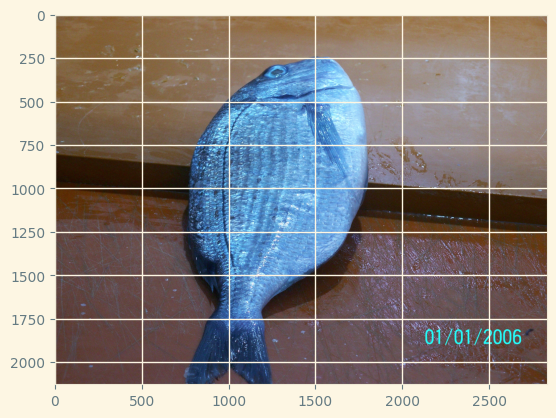

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Red Sea Bream/100_1461.JPG"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Red Sea Bream/100_1462.JPG"
input_path = "/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Red Sea Bream/100_1463.JPG"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 1s/step
***** Input Image Given having ##Sea Bass## type Fish **********


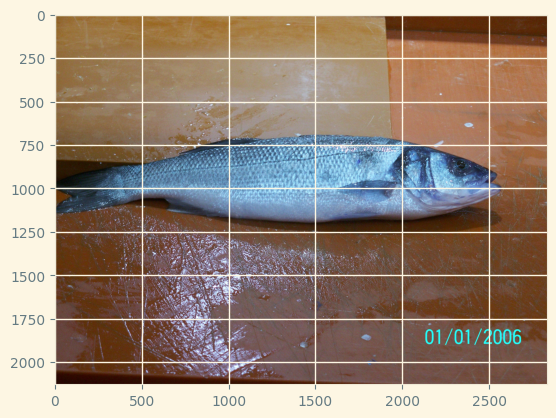

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Sea Bass/1.JPG"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Sea Bass/10.JPG"
input_path = "/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Sea Bass/12.JPG"

img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 2s 2s/step
***** Input Image Given having ##Shrimp## type Fish **********


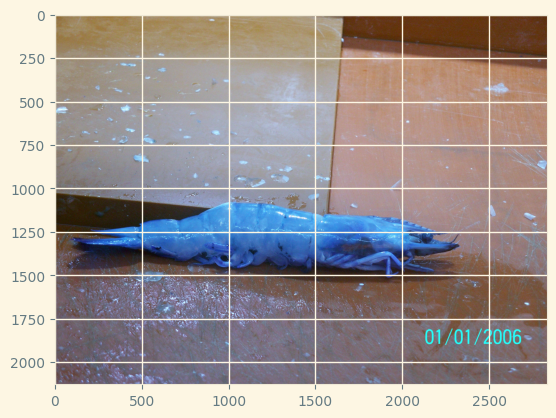

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Shrimp/00001.png"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Shrimp/00002.png"
input_path = "/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Shrimp/00003.png"
img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 2s 2s/step
***** Input Image Given having ##Striped Red Mullet## type Fish **********


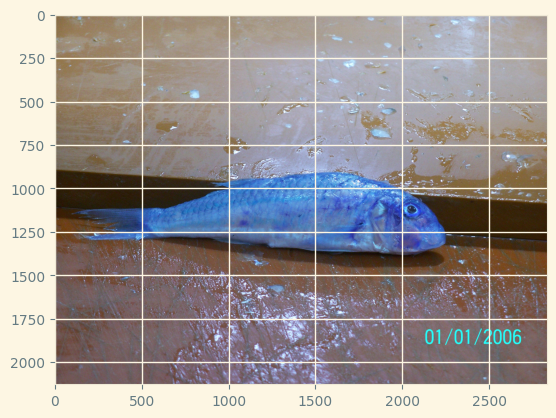

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Striped Red Mullet/00001.png"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Striped Red Mullet/00002.png"
input_path = "/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Striped Red Mullet/00003.png"

img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')

1/1 [==============================] - 1s 730ms/step
***** Input Image Given having ##Trout## type Fish **********


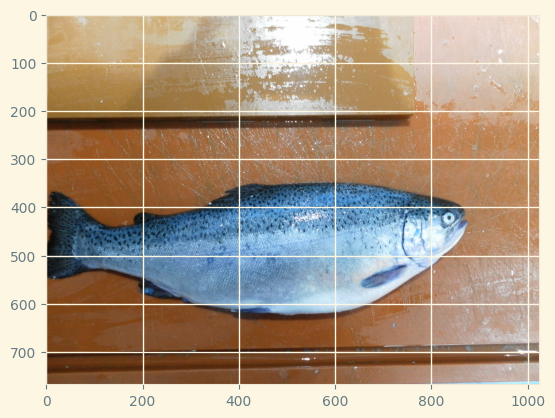

In [ ]:
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Trout/00001.png"
"/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Trout/00002.png"
input_path = "/content/drive/MyDrive/fish_classification/NA_Fish_Dataset/Trout/00003.png"

img , image_cat = demo_prediction(input_path)
plt.imshow(img)
print(f'***** Input Image Given having ##{image_cat}## type Fish **********')